# Pymaceuticals Inc and the Power of Plots

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath1 = ('Resources/mouse_drug_data.csv')
filepath2 = ('Resources/clinical_trial_data.csv')

In [3]:
mouse_drug_df = pd.read_csv(filepath1)
clinical_trial_df = pd.read_csv(filepath2)

print(len(mouse_drug_df))
print(len(clinical_trial_df))

250
1893


In [4]:
print(mouse_drug_df.head(5))
print(clinical_trial_df.head(5))

  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [5]:
new_clinical_trial_df = clinical_trial_df.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')
print(len(new_clinical_trial_df))

new_mouse_drug_df = mouse_drug_df.drop_duplicates(['Mouse ID'], keep='first')
print(len(new_mouse_drug_df))

1888
249


In [6]:
# Combine the data
complete_df = pd.merge(new_clinical_trial_df,new_mouse_drug_df,on='Mouse ID',how='left')
print(len(complete_df))

1888


In [7]:
complete_df.to_excel('Resources/complete_df.xlsx', index=False)

In [8]:
complete_df.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril
5,h246,0,45.0,0,Ketapril
6,p189,0,45.0,0,Ketapril
7,n923,0,45.0,0,Ketapril
8,q119,0,45.0,0,Ketapril
9,f993,0,45.0,0,Naftisol


## Tumor Response to Treatment

In [9]:
%matplotlib notebook

In [10]:
# For tumor_vol_df extract only columns "Drug", "Timepoint" and "Tumor Volume (mm3)"
tumor_Volume_df = complete_df.loc[:,['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_Volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.0
1,Ketapril,0,45.0
2,Ketapril,0,45.0
3,Ketapril,0,45.0
4,Ketapril,0,45.0


In [11]:
# Calculate mean and standard error of the mean (sem) for the 'Tumor Volume'
tumor_Volume_Mean_Sem_df = tumor_Volume_df.groupby(['Drug', 'Timepoint']).agg({"Tumor Volume (mm3)" :["mean", "sem"]})
tumor_Volume_Mean_Sem_df.head()

Tumor Volume (mm3)          
                                  mean       sem
Drug      Timepoint                             
Capomulin 0                  45.000000  0.000000
          5                  44.266086  0.448593
          10                 43.084291  0.702684
          15                 42.064317  0.838617
          20                 40.716325  0.909731

In [12]:
# Create lists of the tumor volume means
capomulin_Mean = tumor_Volume_Mean_Sem_df.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
infubinol_Mean = tumor_Volume_Mean_Sem_df.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
ketapril_Mean = tumor_Volume_Mean_Sem_df.loc['Ketapril'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
placebo_Mean = tumor_Volume_Mean_Sem_df.loc['Placebo'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()

In [13]:
# Create lists of the tumor volume sems
capomulin_Sem = tumor_Volume_Mean_Sem_df.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
infubinol_Sem = tumor_Volume_Mean_Sem_df.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
ketapril_Sem = tumor_Volume_Mean_Sem_df.loc['Ketapril'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
placebo_Sem = tumor_Volume_Mean_Sem_df.loc['Placebo'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()

<IPython.core.display.Javascript object>


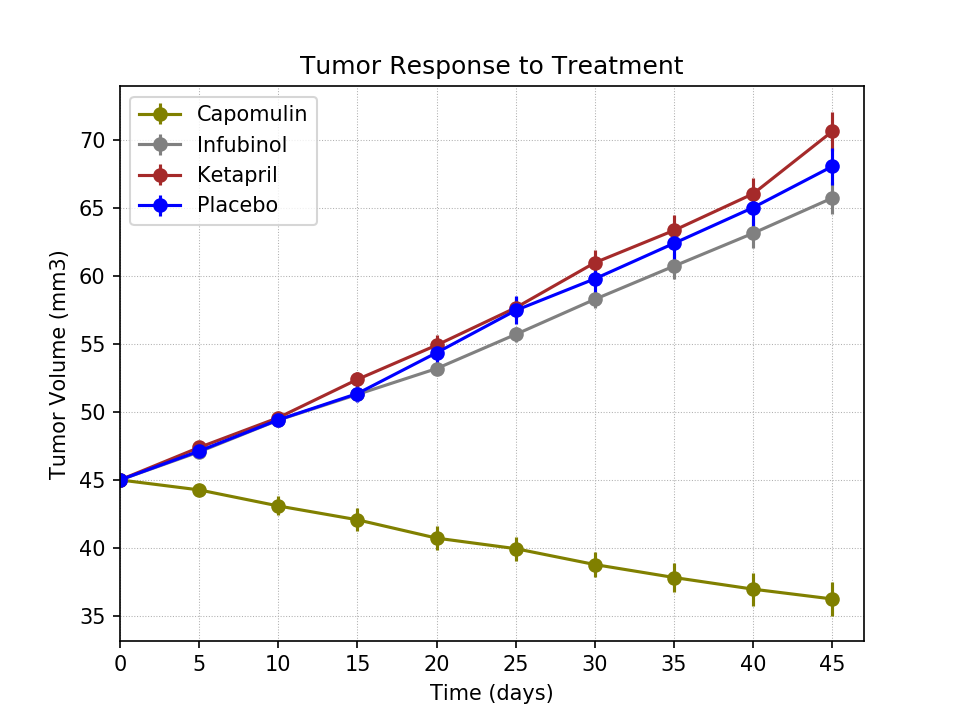

In [14]:
# Scatter plot showing how tumor volume changes over time for each treatment

ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Plot the 'mean' list vs. the established x axis with error 
ax.errorbar(x_axis, capomulin_Mean, yerr=capomulin_Sem, fmt="olive",marker='o',label="Capomulin")
ax.errorbar(x_axis, infubinol_Mean, yerr=infubinol_Sem, fmt="gray",marker='o',label="Infubinol")
ax.errorbar(x_axis, ketapril_Mean, yerr=ketapril_Sem, fmt="brown",marker='o',label="Ketapril")
ax.errorbar(x_axis, placebo_Mean, yerr=placebo_Sem, fmt="blue",marker='o',label="Placebo")

# Add the legend and gridlines
ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations)
ax.grid(linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis)+2)
        
# Show the resulting scatter plot
plt.show()


In [15]:
plt.close()

## Metastatic Response to Treatment


In [16]:
%matplotlib notebook

In [17]:
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [18]:
# For tumor_vol_df extract only columns "Drug", "Timepoint" and "Tumor Volume (mm3)"
metastatic_df = complete_df.loc[:,['Drug', 'Timepoint', 'Metastatic Sites']]
metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0
1,Ketapril,0,0
2,Ketapril,0,0
3,Ketapril,0,0
4,Ketapril,0,0


In [19]:
# Calculate mean and standard error of the mean (sem) for the 'Metastatic Sites'
metastatic_Mean_Sem_df = metastatic_df.groupby(['Drug', 'Timepoint']).agg({"Metastatic Sites" :["mean", "sem"]})
metastatic_Mean_Sem_df.head()

Metastatic Sites          
                                mean       sem
Drug      Timepoint                           
Capomulin 0                 0.000000  0.000000
          5                 0.160000  0.074833
          10                0.320000  0.125433
          15                0.375000  0.132048
          20                0.652174  0.161621

In [20]:
# Create lists of the tumor volume means
capomulin_Met_Mean = metastatic_Mean_Sem_df.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
infubinol_Met_Mean = metastatic_Mean_Sem_df.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
ketapril_Met_Mean = metastatic_Mean_Sem_df.loc['Ketapril'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
placebo_Met_Mean = metastatic_Mean_Sem_df.loc['Placebo'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()

In [21]:
# Create lists of the tumor volume sems
capomulin_Met_Sem = metastatic_Mean_Sem_df.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
infubinol_Met_Sem = metastatic_Mean_Sem_df.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
ketapril_Met_Sem = metastatic_Mean_Sem_df.loc['Ketapril'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
placebo_Met_Sem = metastatic_Mean_Sem_df.loc['Placebo'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()

<IPython.core.display.Javascript object>


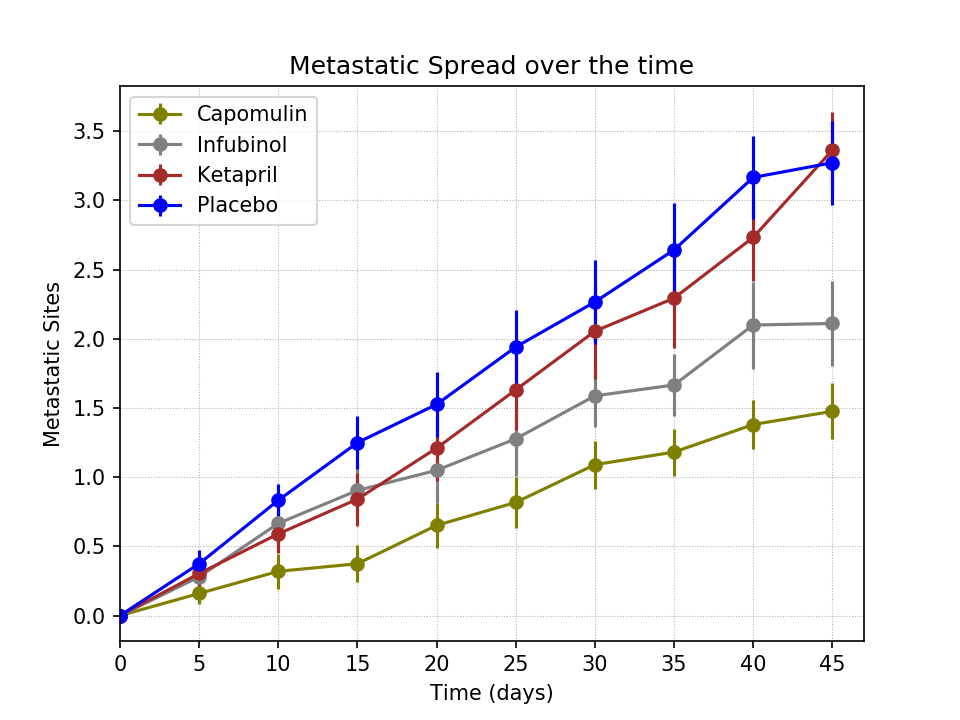

In [22]:
# Scatter plot showing metastatic sites changes over time for each treatment

ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Metastatic Spread over the time")
plt.xlabel("Time (days)")
plt.ylabel("Metastatic Sites")

# Plot the 'mean' list vs. the established x axis with error 
ax.errorbar(x_axis, capomulin_Met_Mean, yerr=capomulin_Met_Sem, fmt="olive",marker='o',label="Capomulin")
ax.errorbar(x_axis, infubinol_Met_Mean, yerr=infubinol_Met_Sem, fmt="gray",marker='o',label="Infubinol")
ax.errorbar(x_axis, ketapril_Met_Mean, yerr=ketapril_Met_Sem, fmt="brown",marker='o',label="Ketapril")
ax.errorbar(x_axis, placebo_Met_Mean, yerr=placebo_Met_Sem, fmt="blue",marker='o',label="Placebo")

# Add the legend and gridlines
ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations)
ax.grid(linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis)+2)
        
# Show the resulting scatter plot
plt.show()


In [23]:
plt.close()

## Survival Rates


In [24]:
%matplotlib notebook

In [25]:
# Count survival rate mice over time grouped by 'Drug' and 'Timepoint
surv_Mouse_Count = complete_df.groupby(['Drug', 'Timepoint'])['Timepoint'].count()
surv_Mouse_Count.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Timepoint, dtype: int64

In [26]:
# Create lists of the mouse counts for each of the four drugs

cap_surv = surv_Mouse_Count.loc['Capomulin'].tolist()
inf_surv = surv_Mouse_Count.loc['Infubinol'].tolist()
ket_surv = surv_Mouse_Count.loc['Ketapril'].tolist()
plc_surv = surv_Mouse_Count.loc['Placebo'].tolist()


In [27]:
# Get a percentage per drug

cap_Surv_Rate = [(x/cap_surv[0])*100 for x in cap_surv]
inf_Surv_Rate = [(x/inf_surv[0])*100 for x in inf_surv]
ket_Surv_Rate = [(x/ket_surv[0])*100 for x in ket_surv]
plc_Surv_Rate = [(x/plc_surv[0])*100 for x in plc_surv]


<IPython.core.display.Javascript object>


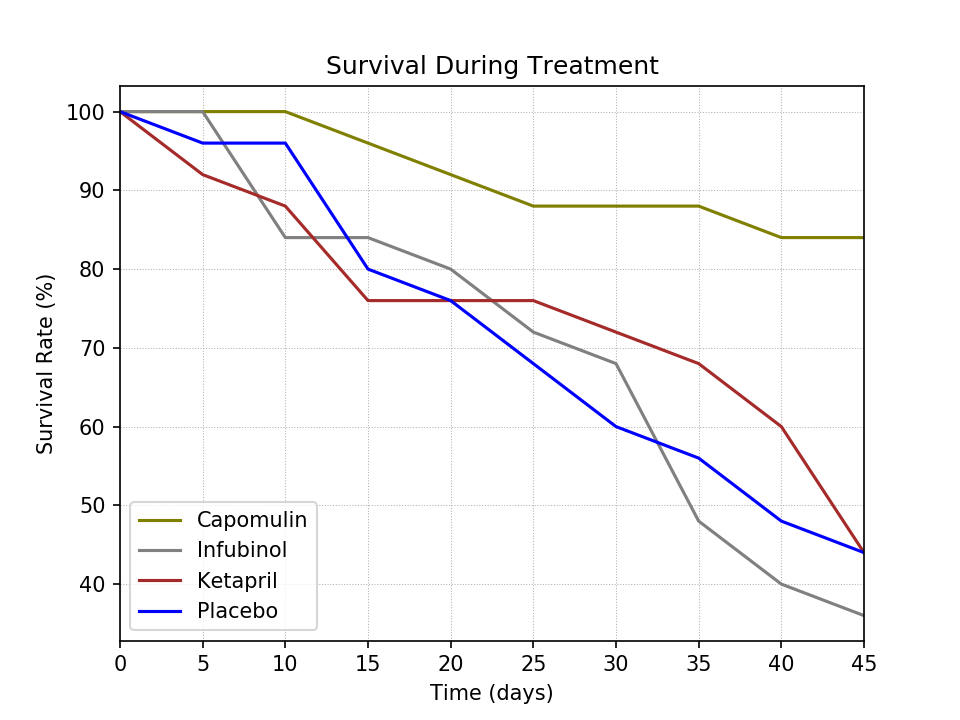

In [28]:
# Scatter plot showing mouse survival rate over time for each treatment

ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")

# Plot the 'mean' list vs. the established x axis with error 
ax.plot(x_axis, cap_Surv_Rate, color="olive", label="Capomulin")
ax.plot(x_axis, inf_Surv_Rate, color="gray", label="Infubinol")
ax.plot(x_axis, ket_Surv_Rate, color="brown", label="Ketapril")
ax.plot(x_axis, plc_Surv_Rate, color="blue", label="Placebo")

# Add the legend and gridlines
ax.legend(loc=3)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis))
        
# Show the resulting scatter plot
plt.show()

In [29]:
plt.close()

## Tumor change

In [30]:
 # Calculate the percent changes for each drug
%matplotlib notebook

In [31]:
# compares the total % tumor volume change for each drug across the full 45 days.
cap_tv_change = int((capomulin_Mean[-1] - capomulin_Mean[0])/capomulin_Mean[0]*100)
inf_tv_change = int((infubinol_Mean[-1] - infubinol_Mean[0])/infubinol_Mean[0]*100)
ket_tv_change = int((ketapril_Mean[-1] - ketapril_Mean[0])/ketapril_Mean[0]*100)
plc_tv_change = int((placebo_Mean[-1] - placebo_Mean[0])/placebo_Mean[0]*100)
print(capomulin_Mean)
print(cap_tv_change)

[45.0, 44.26608641544399, 43.084290581884, 42.0643173468125, 40.71632532212173, 39.93952782686818, 38.76933928855454, 37.816838882513636, 36.95800081089523, 36.23611379944762]
-19


<IPython.core.display.Javascript object>


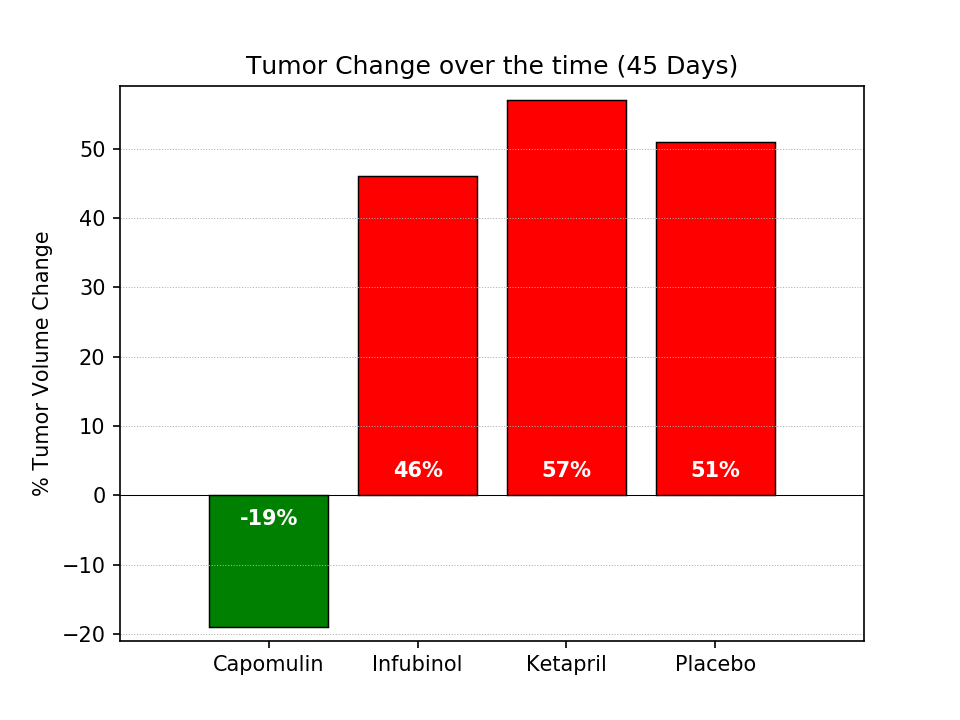

In [32]:
# Bar graph showing tumor growth % over time for each treatment

# y values using a list
y = [cap_tv_change, inf_tv_change, ket_tv_change, plc_tv_change]

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0,4,1)

# Set the colors of the bars depending on if pos or neg

colors = []
for item in y:
    if item < 0:
        colors.append('green')
    else:
        colors.append('red')
        
# Set up the bar graph 

tumor_Var_Growth_bar = plt.bar(x_axis, y, color=colors, alpha=1.0, edgecolor='black', linewidth=0.7)

# Set the plot title and axes titles

plt.title("Tumor Change over the time (45 Days)")
plt.ylabel("% Tumor Volume Change")

# plt.xticks() set the location and labels of the ticks on the x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

# Set the limit of the x and y axes. lim(start, end)
plt.xlim(-1, len(x_axis))
plt.ylim(min(y)-2, max(y)+2)

# Plot horizontal line at y=0
plt.hlines(0, -1, len(x_axis), alpha=1.0, linewidth=0.5)

# Add gridlines
plt.grid('on', which='major', axis='y', linestyle='dotted', linewidth=0.5)

# Set up labels with the percentage change for each bar
def autolabel(rects):
    for i,rect in enumerate(rects):
        height = int(y[i])
        if height >= 0:
            plt.text(rect.get_x()+rect.get_width()/2., 2, '%s%%'% (y[i]),
                ha='center', va='bottom', color='white', weight='bold')
        else:
            plt.text(rect.get_x()+rect.get_width()/2., -2, '%s%%'% (y[i]),
                ha='center', va='top', color='white', weight='bold')          

autolabel(tumor_Var_Growth_bar)


# Show the resulting scatter plot
plt.show()



In [33]:
plt.close()

## Drugs Analysis

1. Graph "Tumor Response to Treatment"

This graph shows that if we focus on tumor volume, the mice taking Capomulin had a better result while the mice taking the other drugs, tumor volume increase almost with the same rate.

2. Graph "Metastatic Response to Treatment"

This graph shows that all tumors had metastatic spread regardless of the drug, although the mice taking Capomulin had slowest metastatic spread and Placebo had the fastest spread.

3. Graph "Survival Rates"

This graph shows that over 80% of the mice taking Capomullin has survived. For the other drugs survival rate dropped with almost same rate after day 30. Infubinol has the worst rate.

4. Graph "Tumor change"

This graph shows the only drug that can reduce the tumor volumen is Capomulin, so it would be the better option.